In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, r2_score as r2
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

### Выбор модели

при выборе будем руководствоваться значениями MSE, R2, MAE и графиком y_test, y_pred

In [81]:
# функция для оценки качества модели
def evaluate_preds(true_values, pred_values):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "MAE:\t" + str(round(mae(true_values, pred_values), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 600000], [0, 600000], linestyle='--', color='black')
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')

    plt.show()

In [3]:
data = pd.read_csv('data/train_prep.csv', header=0)
data.head()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,...,Shops_1,Shops_2,Price,Helthcare_2_0,Helthcare_2_1,Helthcare_2_2,Helthcare_2_3,Helthcare_2_4,Helthcare_2_5,Helthcare_2_6
0,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,0,0,...,11,0,184966.930730,1,0,0,0,0,0,0
1,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,0,0,...,16,0,300009.450063,0,1,0,0,0,0,0
2,2.0,44.947953,29.197612,6.0,8,12.0,1968,0.049637,0,0,...,3,0,220925.908524,0,1,0,0,0,0,0
3,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,0,0,...,5,0,175616.227217,1,0,0,0,0,0,0
4,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,0,0,...,4,0,150226.531644,0,0,1,0,0,0,0


In [4]:
x = data.drop(['Price'], axis=1)
y = data['Price']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=21)

In [6]:
x_train.head()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,...,Social_3,Shops_1,Shops_2,Helthcare_2_0,Helthcare_2_1,Helthcare_2_2,Helthcare_2_3,Helthcare_2_4,Helthcare_2_5,Helthcare_2_6
3623,1.0,41.617018,22.186363,10.0,5,15.0,1975,0.127812,0,0,...,5,3,0,0,1,0,0,0,0,0
3390,1.0,39.362294,38.530064,9.0,14,17.0,2016,0.243205,0,0,...,0,0,0,1,0,0,0,0,0,0
3194,1.0,39.010836,29.010836,10.0,12,19.0,1977,0.211401,0,0,...,0,1,0,1,0,0,0,0,0,0
1550,1.0,48.155074,42.155074,6.0,4,15.0,1977,0.072158,0,0,...,1,0,1,1,0,0,0,0,0,0
3448,2.0,46.969867,28.424174,5.0,4,5.0,1965,0.122090,0,0,...,7,0,0,0,0,0,0,1,0,0


Стандартизируем данные

In [7]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [8]:
x_test = scaler.transform(x_test)

### Линейная регрессия

In [87]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred_train = lr.predict(x_train)

R2:	0.514
MAE:	44434.267
MSE:	4132933717.072


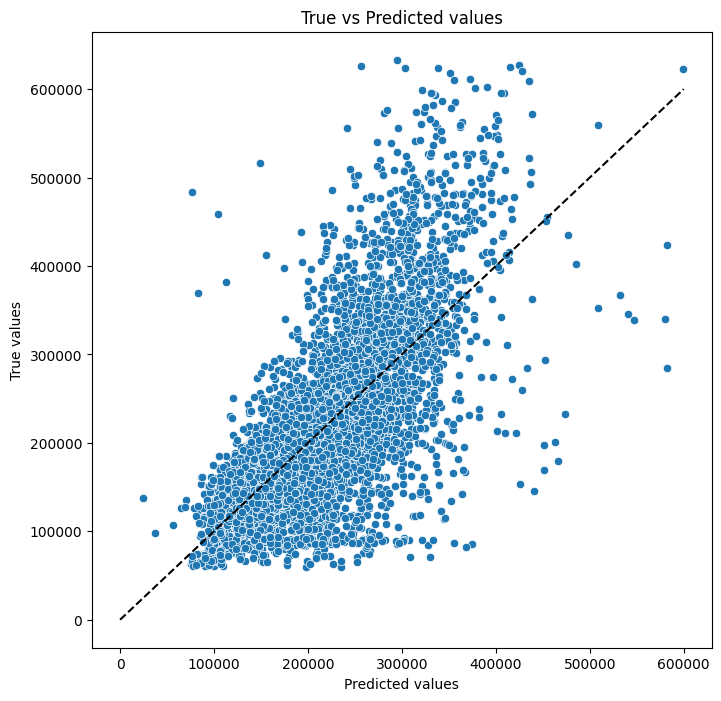

In [88]:
evaluate_preds(y_train, y_pred_train)

R2:	0.524
MAE:	45065.973
MSE:	4241142328.36


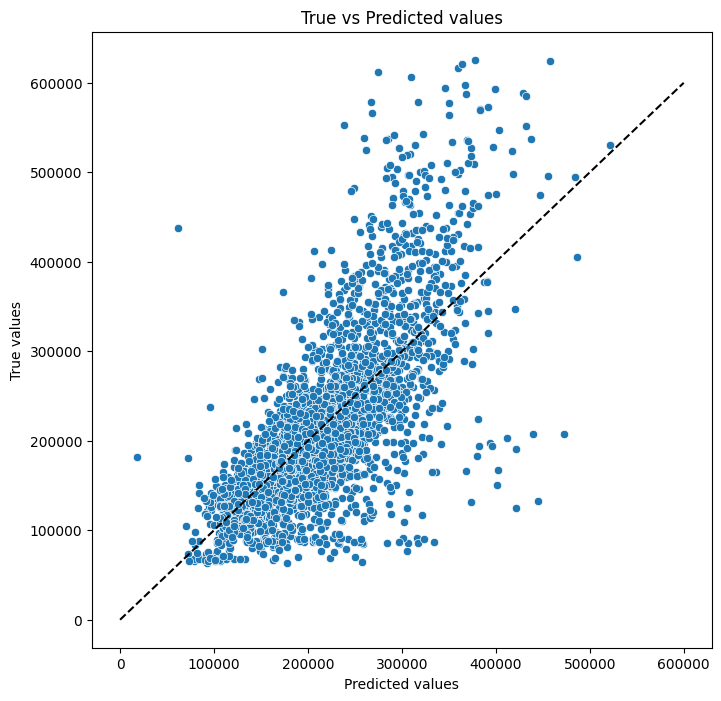

In [89]:
evaluate_preds(y_test, y_pred)

### SVR

С помощью грид серча мы выяснили что наилучшее значение С = 600 000

In [83]:
clf = SVR(C=600000)
clf.fit(x_train, y_train)

SVR(C=600000)

In [85]:
y_pred = clf.predict(x_test)

R2:	0.708
MAE:	30537.157
MSE:	2604970964.586


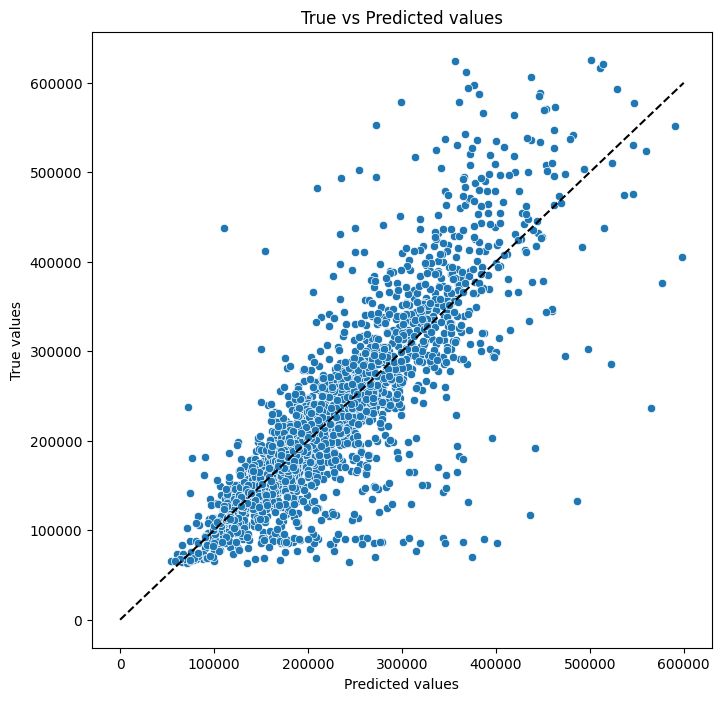

In [86]:
evaluate_preds(y_test, y_pred)